# Demonstration of SFILES 2.0 <-> flowsheet graph conversion

### Example 1

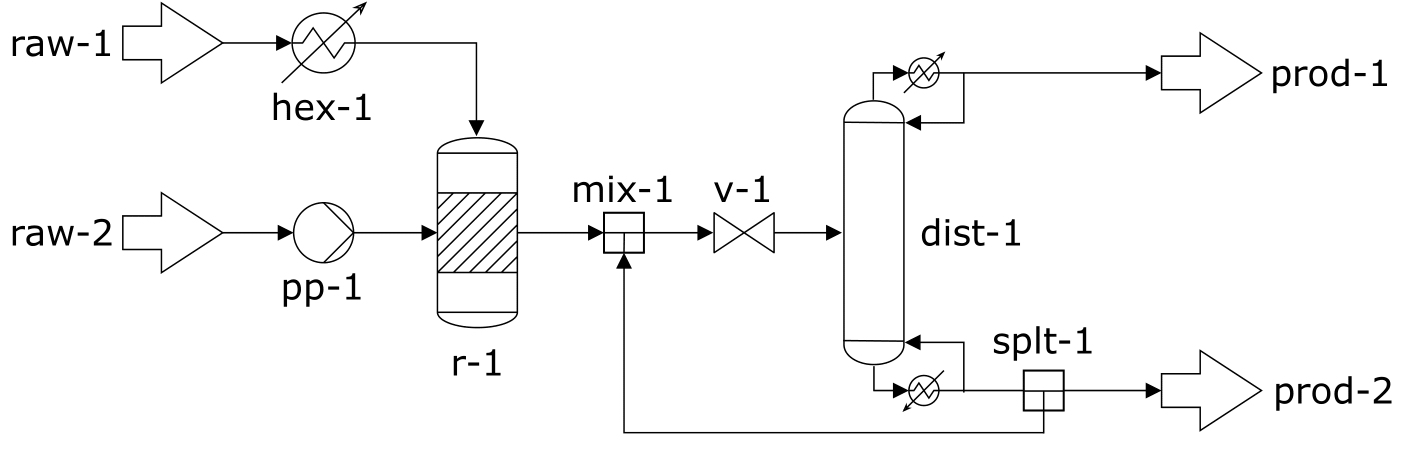

In [2]:
from IPython.display import Image
Image(filename='examples/Flowsheet_intro-1.png') 

How to create graph: 
- add all unit operations as nodes with numbered name (refer to standardized names in paper)
- add all stream connections as edges.   
Format:  ('node-1', 'node-2', {'labels': 'streamlabel', 'tags':{'col': [<'tout','tin','bout','bin'>], 'he': [<'x_in','x_out'>]}})

In [5]:
import networkx as nx
G = nx.DiGraph()
G.add_nodes_from(['raw-1', 'raw-2', 'hex-1', 'pp-1', 'r-1', 'mix-1', 'v-1', 'dist-1', 'splt-1', 'prod-1', 'prod-2'])
G.add_edges_from([('raw-1', 'hex-1'),('hex-1', 'r-1'), ('raw-2', 'pp-1'), ('pp-1', 'r-1'), ('r-1', 'mix-1'), ('mix-1', 'v-1'), ('v-1', 'dist-1'), ('dist-1', 'prod-1', {'tags':{'col': ['tout']}}), ('dist-1', 'splt-1', {'tags':{'col': ['bout']}}), ('splt-1','mix-1'), ('splt-1', 'prod-2')])

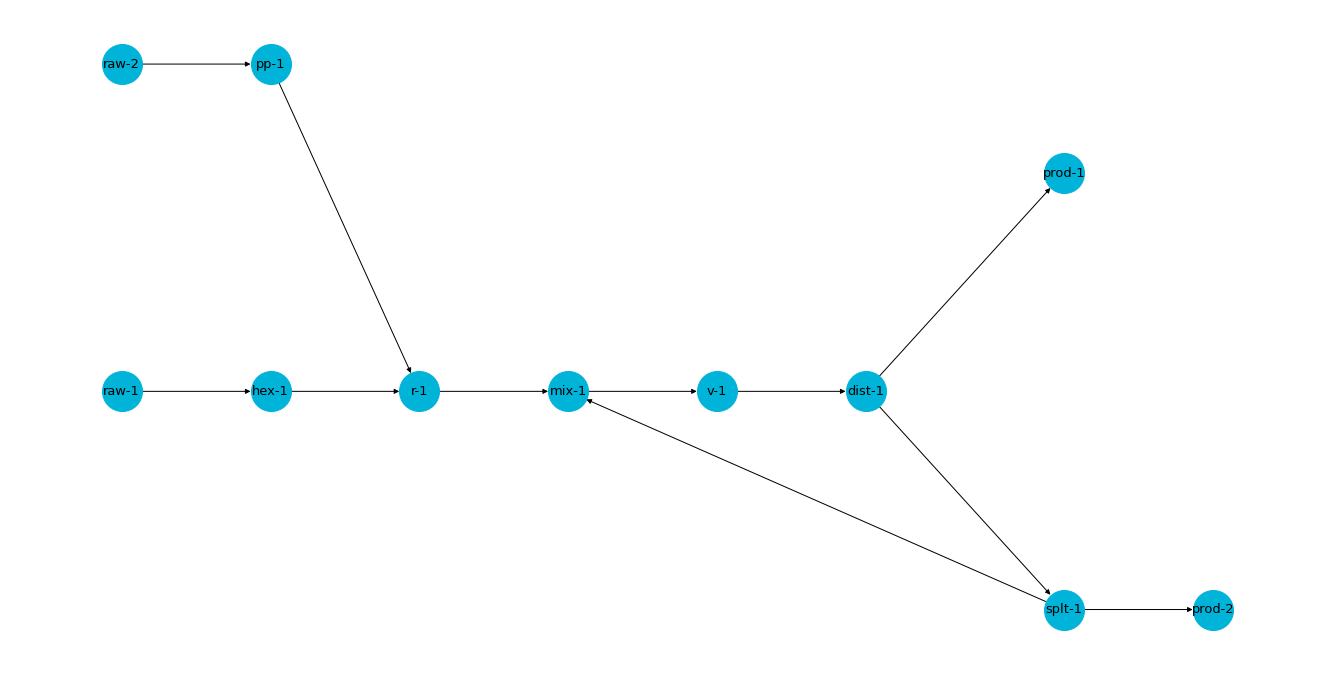

(<Figure size 1320x660 with 1 Axes>, None, None)

In [9]:
from Flowsheet_Class.flowsheet import Flowsheet
flowsheet_1=Flowsheet()
flowsheet_1.state=G
flowsheet_1.visualize_flowsheet(table=False, pfd_path='plots/flowsheet1', plot_with_stream_labels=False)


In [10]:
flowsheet_1.convert_to_sfiles(version='v2')
sfiles_1 = flowsheet_1.sfiles
print(sfiles_1)
flowsheet_1.create_from_sfiles(sfiles_1, override_nx=True)
flowsheet_1.convert_to_sfiles(version='v2')
sfiles_2 = flowsheet_1.sfiles
print(sfiles_1==sfiles_2)

(raw)(hex)(r)<&|(raw)(pp)&|(mix)<1(v)(dist)[{tout}(prod)]{bout}(splt)1(prod)
Overwriting the current self.sfiles_list
True
